<a href="https://colab.research.google.com/github/ProboKrishnacahya/Machine_Learning/blob/main/Meeting_3_EDA_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# Import libraries for EDA and Visualization
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame manipulation
A DataFrame is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column.

## Creating DataFrame

In [75]:
main_office = {
    'name' : ['Jack', 'Aamir', 'Catherine'],
    'age' : [34, 30, 26],
    'city' : ['Sydney', 'Delhi', 'New york'],
    'country': ['Australia', 'India', 'USA']
}

# Create a DataFrame from main office employee dictionary
dataframe = pd.DataFrame(main_office)
dataframe.head()

,name,age,city,country
0,Jack,34,Sydney,Australia
1,Aamir,30,Delhi,India
2,Catherine,26,New york,USA


## Add new row
Becareful, when using append, you need to assign to new DataFrame

In [76]:
# Add new employee named Utomo from Jakarta
mod_df = dataframe.append({'name':'Utomo', 'city':'Jakarta'}, ignore_index=True)
print(dataframe)
print('')
print(mod_df)

        name  age      city    country
0       Jack   34    Sydney  Australia
1      Aamir   30     Delhi      India
2  Catherine   26  New york        USA

        name   age      city    country
0       Jack  34.0    Sydney  Australia
1      Aamir  30.0     Delhi      India
2  Catherine  26.0  New york        USA
3      Utomo   NaN   Jakarta        NaN


In [77]:
branch_office = {
    'name' : ['Sananthachat', 'Mansoor', 'Farida'],
    'age' : [24, 40, 28],
    'city' : ['Bangkok', 'Dubai', 'Tehran'],
    'country': ['Thailand', 'UAE', 'Iran']
}

# Create another DataFrame for branch office employees
branch_office_df = pd.DataFrame(branch_office)

In [78]:
# Add (concat) branch office employees to main office's
dataframe = pd.concat([mod_df, branch_office_df], ignore_index=True)
dataframe

,name,age,city,country
0,Jack,34.0,Sydney,Australia
1,Aamir,30.0,Delhi,India
2,Catherine,26.0,New york,USA
3,Utomo,NaN,Jakarta,NaN
4,Sananthachat,24.0,Bangkok,Thailand
5,Mansoor,40.0,Dubai,UAE
6,Farida,28.0,Tehran,Iran


## Editing DataFrame

In [79]:
# Fix 'New york' to 'New York'
dataframe.city = dataframe.city.replace(['New york'], 'New York')
dataframe

,name,age,city,country
0,Jack,34.0,Sydney,Australia
1,Aamir,30.0,Delhi,India
2,Catherine,26.0,New York,USA
3,Utomo,NaN,Jakarta,NaN
4,Sananthachat,24.0,Bangkok,Thailand
5,Mansoor,40.0,Dubai,UAE
6,Farida,28.0,Tehran,Iran


## Adding Column

In [80]:
# Data tinggi dan berat untuk semua karyawan sebagai berikut:
height_in_cm = [178, 181, 167, 166, 171, 185, 160]
weight_in_kg = [90, 70, 67, 89, 70, 102, 45]

# Tambahkan data tinggi dan berat ke main office dan branch office employees
dataframe['height_in_cm'] = height_in_cm
dataframe['weight_in_kg'] = weight_in_kg
dataframe.head()

,name,age,city,country,height_in_cm,weight_in_kg
0,Jack,34.0,Sydney,Australia,178,90
1,Aamir,30.0,Delhi,India,181,70
2,Catherine,26.0,New York,USA,167,67
3,Utomo,NaN,Jakarta,NaN,166,89
4,Sananthachat,24.0,Bangkok,Thailand,171,70


In [81]:
# Tambahkan kolom BMI (Body Mass Index) untuk setiap karyawan
# Rumus BMI: BMI = weight (kg) / height2 (m) 
# Gunakan Lambda function dan method assign
dataframe = dataframe.assign(BMI = lambda x: (x['weight_in_kg'] / (x['height_in_cm'] / 100)))
dataframe

,name,age,city,country,height_in_cm,weight_in_kg,BMI
0,Jack,34.0,Sydney,Australia,178,90,50.561798
1,Aamir,30.0,Delhi,India,181,70,38.674033
2,Catherine,26.0,New York,USA,167,67,40.119760
3,Utomo,NaN,Jakarta,NaN,166,89,53.614458
4,Sananthachat,24.0,Bangkok,Thailand,171,70,40.935673
5,Mansoor,40.0,Dubai,UAE,185,102,55.135135
6,Farida,28.0,Tehran,Iran,160,45,28.125000


## Locating data

In [82]:
# Dengan method loc, tampilkan data dengan nama employee 'Aamir'
dataframe.loc[dataframe['name'] == 'Aamir']

,name,age,city,country,height_in_cm,weight_in_kg,BMI
1,Aamir,30.0,Delhi,India,181,70,38.674033


In [83]:
# Dengan method iloc, tampilkan data dengan index 1 sampai 3
dataframe.iloc[1 : 4]

,name,age,city,country,height_in_cm,weight_in_kg,BMI
1,Aamir,30.0,Delhi,India,181,70,38.674033
2,Catherine,26.0,New York,USA,167,67,40.119760
3,Utomo,NaN,Jakarta,NaN,166,89,53.614458


## Dealing with Missing Values
Check out this DataFrame:<br>
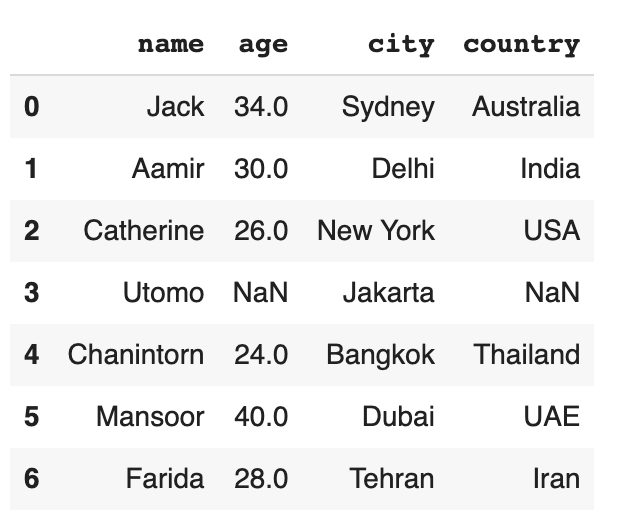

In [84]:
# Check if there is missing values. Use isna() and any()
dataframe.isna().any()

name            False
age              True
city            False
country          True
height_in_cm    False
weight_in_kg    False
BMI             False
dtype: bool

In [85]:
# Since our data is so little, please change the NaN to 
# mean of all values in 'age' column
dataframe.age.fillna(value=dataframe.age.mean(), inplace=True)
dataframe

,name,age,city,country,height_in_cm,weight_in_kg,BMI
0,Jack,34.000000,Sydney,Australia,178,90,50.561798
1,Aamir,30.000000,Delhi,India,181,70,38.674033
2,Catherine,26.000000,New York,USA,167,67,40.119760
3,Utomo,30.333333,Jakarta,NaN,166,89,53.614458
4,Sananthachat,24.000000,Bangkok,Thailand,171,70,40.935673
5,Mansoor,40.000000,Dubai,UAE,185,102,55.135135
6,Farida,28.000000,Tehran,Iran,160,45,28.125000


In [86]:
# Drop all data containing NaN
dataframe.dropna(inplace=True)
dataframe

,name,age,city,country,height_in_cm,weight_in_kg,BMI
0,Jack,34.0,Sydney,Australia,178,90,50.561798
1,Aamir,30.0,Delhi,India,181,70,38.674033
2,Catherine,26.0,New York,USA,167,67,40.119760
4,Sananthachat,24.0,Bangkok,Thailand,171,70,40.935673
5,Mansoor,40.0,Dubai,UAE,185,102,55.135135
6,Farida,28.0,Tehran,Iran,160,45,28.125000


# Exploratory Data Analysis 

## Loading flights Dataset from Seaborn
```
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64
 ```



In [87]:
# Load dataset 'flights' dari library seaborn
df = sns.load_dataset(name='flights')

# Tampilkan secara acak lima sample penerbangan
df.sample(n=5)

,year,month,passengers
33,1951,Oct,162
75,1955,Apr,269
127,1959,Aug,559
131,1959,Dec,405
63,1954,Apr,227


In [88]:
# Tampilkanlah Tendensi Sentral (central tendency) dari dataset ini 
df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [89]:
# Tampilkanlan jumlah total penerbangan per tahun dengan groupby year
df.groupby(by=['year']).sum()

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


Text(0, 0.5, 'Passenger')

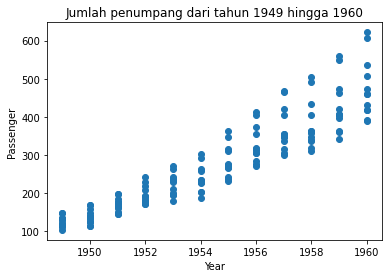

In [90]:
# Buatlah sebuah scatter plot untuk menunjukkan apakah
# dari tahun 1949 hingga 1960 jumlah penumpang cenderung naik?
plt.scatter(df.year, df.passengers)
plt.title('Jumlah penumpang dari tahun 1949 hingga 1960')
plt.xlabel('Year')
plt.ylabel('Passenger')

In [91]:
# Pada bulan apakah jumlah penumpang paling banyak
df['month'].iloc[df['passengers'].idxmax()]

'Jul'

## Locating specific data

In [92]:
# Tampilkan data penerbangan pada bulan Nov, tahun 1950
df.loc[(df['month'] == 'Nov') & (df['year'] == 1950)]

,year,month,passengers
22,1950,Nov,114


In [108]:
# Tampilkan data penerbangan pada index ke 1, 12, 23, 45, dan 56
df.iloc[[1,12,23,45,56]]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
24,Arbok,Poison,NaN,438,60,85,69,65,79,80,2,False
46,Paras,Bug,Grass,285,35,70,55,45,55,25,1,False
57,Primeape,Fighting,NaN,455,65,105,60,60,70,95,2,False


# Data Visualization

CV. Sepeda Sejahtera adalah distributor sepeda di Surabaya. Buatlah visualisasi data dari sales mereka pada bulan Nov 2020, lalu jelaskan pada tanggal berapa mereka mengalami penurunan dan peningkatan terbesar dalam penjualan.

data penjualan nov 2020: https://raw.githubusercontent.com/twiradinata/datasets/main/bike_sales_nov_2020.csv

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


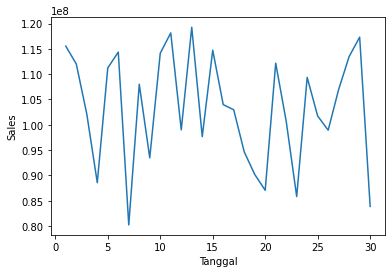

,Tanggal,Sales
6,7,80225497


In [109]:
# Buatlah line chart untuk menggambarkan fluktuasi penjualan sepeda, lalu
# tentukanlah grafik ter-rendah dari penjualan sepeda.
file_name = "https://raw.githubusercontent.com/twiradinata/datasets/main/bike_sales_nov_2020.csv"
dataframe = pd.read_csv(file_name, delimiter=";")

sns.lineplot(dataframe.Tanggal, dataframe.Sales)
plt.show()
print('')
dataframe.loc[dataframe['Sales'] == dataframe['Sales'].min()]

## Visualizing Pokemon Data

In [95]:
file_name = "https://raw.githubusercontent.com/twiradinata/datasets/main/pokemon_collection.csv"
df = pd.read_csv(file_name, delimiter=";", index_col = 0)
df.sample(n=10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,2,False
31,Nidoqueen,Poison,Ground,505,90,92,87,75,85,76,3,False
89,Muk,Poison,NaN,500,105,105,75,65,100,50,2,False
68,Machamp,Fighting,NaN,505,90,130,80,65,85,55,3,False
79,Slowpoke,Water,Psychic,315,90,65,65,40,40,15,1,False
14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,2,False
80,Slowbro,Water,Psychic,490,95,75,110,100,80,30,2,False
63,Abra,Psychic,NaN,310,25,20,15,105,55,90,1,False
117,Seadra,Water,NaN,440,55,65,95,95,45,85,2,False


In [110]:
# Buatlah DataFrame baru berisi hanya pokemon yang 'Type 1' nya Electric
electric = df.loc[df['Type 1'] == 'Electric']
electric

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False
26,Raichu,Electric,NaN,485,60,90,55,90,80,110,2,False
81,Magnemite,Electric,Steel,325,25,35,70,95,55,45,1,False
82,Magneton,Electric,Steel,465,50,60,95,120,70,70,2,False
100,Voltorb,Electric,NaN,330,40,30,50,55,55,100,1,False
101,Electrode,Electric,NaN,480,60,50,70,80,80,140,2,False
125,Electabuzz,Electric,NaN,490,65,83,57,95,85,105,1,False
135,Jolteon,Electric,NaN,525,65,65,60,110,95,130,2,False
145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True


In [111]:
# Berdasarkan 'Type 1' pokemon manakah yang rata-rata Speed nya paling tinggi?
df.groupby('Type 1')['Speed'].mean().idxmax()

'Electric'

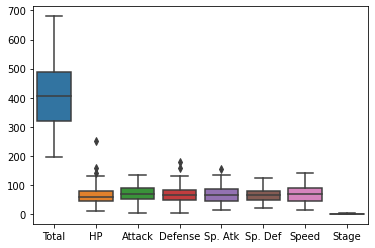

In [112]:
# Buatlah Boxplot menampilkan seluruh data numerik dari pokemon
num = df.drop(['Name','Type 1','Type 2','Legendary'], axis=1)
sns.boxplot(data=num)

In [113]:
# Buat DataFrame khusus untuk Individual Combat Stats, dimana
# kolom "Total", "Stage", dan "Legendary" tidak diperlukan (drop)
stats = df.drop(['Total','Stage','Legendary'], axis = 1)

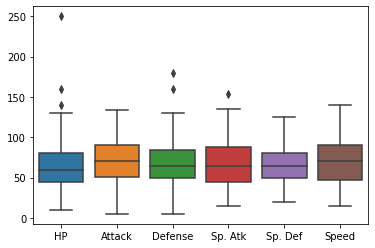

In [114]:
# Tampilkan Boxplot Individual Combat Stats
sns.boxplot(data=stats)

## Menampilkan korelasi antar variabel dari Individual Combat Stats 

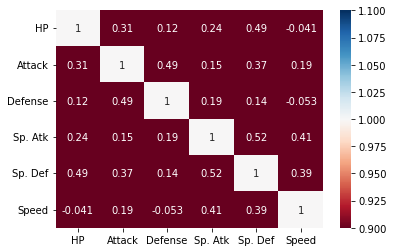

In [115]:
# Calculate correlation between variables in Individual Combat Stats
correlation = stats.corr()

# Display correlation coeficient using Heatmap
sns.heatmap(correlation, vmin = 1, vmax = 1, cmap = 'RdBu', annot = True)
plt.show()

<h1 align='center'>=== Selamat Bekerja ===</h1>

# Assignment

In [102]:
app_data = 'https://raw.githubusercontent.com/gorbulus/WineReviewAnalysis/master/app_data/winemag-data_first150k.csv'
reviews = pd.read_csv(app_data)
reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [121]:
# Select the first row of data (the first record) from reviews, assigning it to the variable first_row.
row = reviews.iloc[0]

# Select the first 10 values from the description column in reviews, assigning the result to variable first_descriptions.
desc = reviews['description'].iloc[:10]

# Select the records with index labels 1, 2, 3, 5, and 8, assigning the result to the variable sample_reviews.
samp = reviews.iloc[[1, 2, 3, 5, 8]]

# Create a variable df containing the country, province, region_1, and region_2 columns of the records with the index labels 0, 1, 10, and 100.
df_loc = reviews[['country', 'province','region_1','region_2']].iloc[[0, 1, 10, 100]]
df_loc

,country,province,region_1,region_2
0,US,California,Napa Valley,Napa
1,Spain,Northern Spain,Toro,NaN
10,Italy,Northeastern Italy,Collio,NaN
100,US,California,South Coast,South Coast


In [122]:
# Create a variable df containing the country and variety columns of the first 100 records.
# Hint: you may use loc or iloc.
df_country = reviews[['country','variety']].iloc[:100]
df_country

,country,variety
0,US,Cabernet Sauvignon
1,Spain,Tinta de Toro
2,US,Sauvignon Blanc
3,US,Pinot Noir
4,France,Provence red blend
...,...,...
95,France,Malbec-Merlot
96,US,Chardonnay
97,US,Cabernet Sauvignon
98,France,Merlot-Malbec


In [123]:
# Buatlah DataFrame khusus wine yang berasal dari Italy
df_wine = reviews.loc[reviews['country'] == 'Italy']
df_wine

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
32,32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
35,35,Italy,"Forest floor, tilled soil, mature berry and a ...",Riserva,90,135.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Carillon
37,37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
38,38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia
...,...,...,...,...,...,...,...,...,...,...,...
150920,150920,Italy,"Rich and mature aromas of smoke, earth and her...",Brut Riserva,91,19.0,Northeastern Italy,Trento,NaN,Champagne Blend,Letrari
150922,150922,Italy,Made by 30-ish Roberta Borghese high above Man...,Superiore,91,NaN,Northeastern Italy,Colli Orientali del Friuli,NaN,Tocai,Ronchi di Manzano
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora


In [124]:
# Berapakah points rata-rata dari wine yang berasal dari France
reviews.loc[reviews['country'] == 'Italy'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Unnamed: 0    71813.179700
points           88.413664
price            37.547913
region_2               NaN
dtype: float64

In [125]:
# Create a DataFrame top_oceania_wines containing all reviews with at least 95 points (out of 100) 
# for wines from Australia or New Zealand.
df_top_oceania_wines = reviews.loc[(reviews['country'] == 'Australia') | (reviews['country'] == 'New Zealand')]
top_oceania_wines_points = df_top_oceania_wines.loc[df_top_oceania_wines['points'] >= 95]
top_oceania_wines_points

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
2148,2148,Australia,Full-bodied and plush yet vibrant and imbued w...,The Factor,98,125.0,South Australia,Barossa Valley,NaN,Shiraz,Torbreck
2458,2458,Australia,This is a top example of the classic Australia...,The Peake,96,150.0,South Australia,McLaren Vale,NaN,Cabernet-Shiraz,Hickinbotham
3033,3033,Australia,This Cabernet equivalent to Grange has explode...,Bin 707,95,500.0,South Australia,South Australia,NaN,Cabernet Sauvignon,Penfolds
3044,3044,Australia,"From vines planted in 1912, this has been an i...",Mount Edelstone Vineyard,95,200.0,South Australia,Eden Valley,NaN,Shiraz,Henschke
3047,3047,Australia,"This is a throwback to those brash, flavor-exu...",One,95,95.0,South Australia,Langhorne Creek,NaN,Red Blend,Heartland
...,...,...,...,...,...,...,...,...,...,...,...
122779,122779,Australia,If Standish's Relic is the feminine side of Sh...,The Standish Single Vineyard,96,135.0,South Australia,Barossa Valley,NaN,Shiraz,Standish
127614,127614,Australia,This stellar wine takes a little time in the g...,Hill of Grace,95,625.0,South Australia,Eden Valley,NaN,Shiraz,Henschke
137383,137383,Australia,The 2007 Astralis impresses for its combinatio...,Astralis,95,225.0,South Australia,Clarendon,NaN,Syrah,Clarendon Hills
150562,150562,Australia,"As unevolved as they are, the dense and multil...",Grange,96,185.0,South Australia,South Australia,NaN,Shiraz,Penfolds
